# Problemas de regresión

## Regresión lineal

In [1]:
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

### Generador de distribución de datos para regresión lineal simple

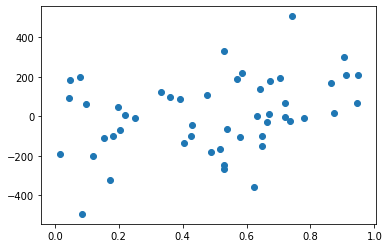

In [2]:
def generador_datos_simple(beta, muestras, desviacion):
    
    # Generación de n (muestras) valores de x aleatorios entre 0 y 100
    
    x = np.random.random(muestras)
    
    # Generación de un error aleatorio gaussiano con desviación típica(desviación)
    
    e = np.random.randn(muestras) * desviacion
    
    # Obtención de y real como x*beta + error 
    
    y = x * beta + e
    
    return x.reshape((muestras, 1)), y.reshape((muestras, 1))

desviacion = 200

beta = 10

n = 50

x, y = generador_datos_simple(beta, n, desviacion)

# Representación de los datos generados 

plt.scatter(x, y)

plt.show()
    
    

En el siguiente paso se crea un modelo de regresión lineal y se ajusta o entrena utilizando los datos (X,Y) disponibles. De este modo se obtiene una estimación de f(X). Cuando se llama al método **Predict(x)** lo que se hace es aplicar esa función estimada para obtener predicciones o estimaciones de la respuesta Y a partir de las variables independientes X.

In [3]:
# Creación de un modelo de regresión lineal 

modelo = linear_model.LinearRegression()

# Entrenar el modelo con los datos (X,Y)

modelo.fit(x, y)

# Ahora se puede obtener el coeficiente b_1

print ('Coeficiente beta1: ', modelo.coef_[0])

# SE puede predecir usanbdo el modelo

y_pred = modelo.predict(x)

# Por último, se calculan el error cuadrático medio y el estadístico R^2  

print ('Error cuadrático medio: %.2f'% mean_squared_error(y, y_pred))

print ('Estadístico R_2: %.2f'% r2_score(y, y_pred))

Coeficiente beta1:  [237.86287628]
Error cuadrático medio: 30585.90
Estadístico R_2: 0.12


Los valores anteriores son métricas que comparan el valor de las predicciones (y_pred) con el valor real de y.

En este caso lo que se obtiene el es error de entrenamiento, ya que es el error que comete el modelo sobre los mismos datos que ha usado para entrenarse (estimar la f(X)). 

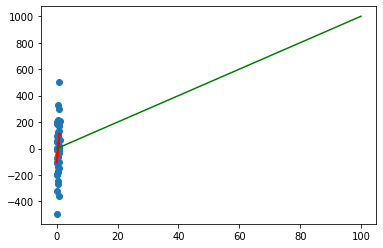

In [4]:
# Se representan el ajuste (rojo) y la recta Y = beta*x (verde)

plt.scatter(x, y)

plt.plot(x, y_pred, color= "red")

x_real = np.array([0,100])

y_real = x_real*beta

plt.plot(x_real, y_real, color = 'green')

plt.show()

In [5]:
x_real

array([  0, 100])

Consideraciones al aplicar este algoritmo:

 +     Supone que existe una relación lineal entre cada variable predictora Xn y la variable que predecir Y. Si la relación entre una variable Xn y la Y no es lineal, la Xn no será buena opción para predecir Y con un modelo lineal como la regresión lineal.

 
 + Los residuos o errores siguen una distribución normal.
 
 
 + Para cumplir las hipótesis, es necesario normalizar las variables predictoras X para que sigan una distribución normal. 
 
 
 + Las variables predictoras X deben ser linealmente independientes. Un buen método es eliminar variables con correlación de Pearson muy alta (<0,9 o 0,95).
 
 
 + Es un modelo muy sensible a valores atípicos u outliers. Estos valores es mejor eliminarlos o limitarlos a un valor máximo.




## K-vecinos más cercanos (KNN)

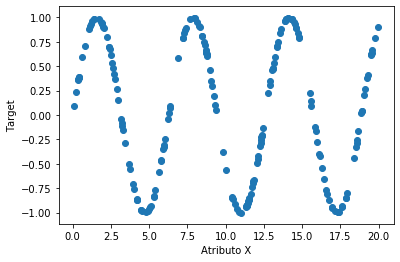

In [10]:
# Importamos librerías

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV

# Generación de datos aleatorios 

np.random.seed(0) # fijamos la semilla para datos aleatorios

X = np.sort(20*np.random.rand(200,1), axis=0)

Y = np.sin(X)[:, 0]

Y_ruido = np.sin(X)[:, 0] + np.random.normal(size = X.shape[0], scale = 0.20)

plt.xlabel("Atributo X")

plt.ylabel("Target")

plt.scatter(X, Y.ravel())

plt.show()

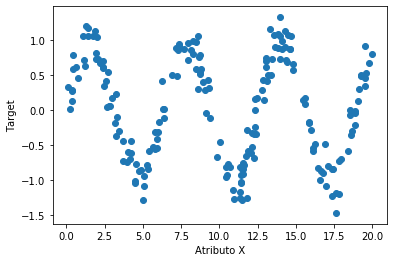

In [19]:
# Generamos  ruido

plt.xlabel("Atributo X")

plt.ylabel("Target")

plt.scatter(X, Y_ruido.ravel())

plt.show()

El mejor estimador es: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')


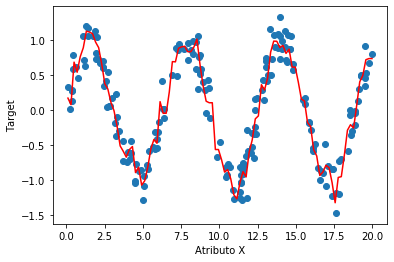

In [21]:
clf = KNeighborsRegressor()

params = {"n_neighbors": range(1,20)}

clf_gs = GridSearchCV(clf, params, cv=3)

clf_gs.fit(X, Y_ruido)

print("El mejor estimador es: {}".format(clf_gs.best_estimator_))

X_axis = np.linspace(X.min(), X.max(), 100).reshape(100, 1)

y_axis_pred = clf_gs.best_estimator_.predict(X_axis)

plt.xlabel("Atributo X")

plt.ylabel("Target")

plt.scatter(X, Y_ruido.ravel())

plt.plot(X_axis, y_axis_pred, c= "red")

plt.show()

## Árboles de decisión

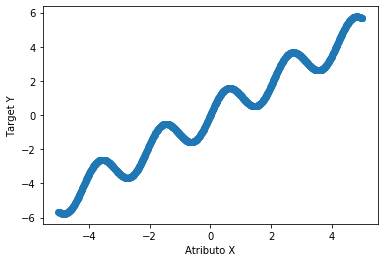

In [23]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score

# Generación de un dataset aleatorio con una variable X y una variable Y

X = np.linspace(-5, 5, 1000).reshape(1000, 1) # 1000 filas, una columna

y_limpia = np.sin(3*X) + X

# Representación de los datos

plt.scatter(X, y_limpia)

plt.xlabel("Atributo X")

plt.ylabel("Target Y")

plt.show()

In [32]:
y_limpia.shape

(1000, 1)

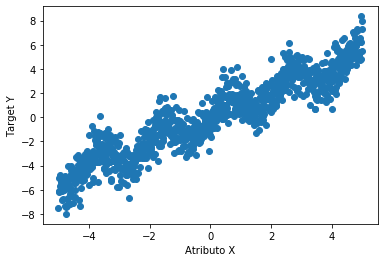

In [33]:
# Se añade ruido a la salida Y para tener una función menos "ideal"

y_ruido = np.random.normal(size = len(X)).reshape(y_limpia.shape)

y = y_limpia + y_ruido

plt.scatter(X, y)

plt.xlabel("Atributo X")

plt.ylabel("Target Y")

plt.show()

En la etapa siguiente se realiza la división de datos en train + test como se explicó en la unidad I.

Los datos de train, a su vez, se dividen en distintos conjuntos con lo que se conoce como validación cruzada.

El método GridSearchCV realiza esa validación cruzada automáticamente. Además, este método se utiliza para optimizar los parámetros aplicando todas sus combinaciones posibles. En este caso, el parámetro que optimizar es max_depth . Se prueban valores entre 3 y 7 y se elige como óptimo el que mejores resultados tenga en los conjuntos de validación por medio de validación cruzada.

En este caso max_depth tiene cinco valores: 3, 4, 5, 6 y 7. Utilizando GridSearchCV se ajusta un modelo usando max_depth=3, se divide (X_train,Y_train) en tres conjuntos, ya que cv=3. Se halla la métrica media de validación en esos tres conjuntos, la cual será la métrica de max_depth=3. Posteriormente, se utiliza max_depth=4 y se vuelve a optener la métrica media de validación en esos tres conjuntos. Análogamente para max_depth=5,6,7. El valor de max_depth que mejor métrica media obtenga es el mejor parámetro.

Posteriormente, el método Predict(X) obtiene la predicción utilizando los mejores parámetros calculados con
GridSearchCV .

El mejor estimador es: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
La R^2 en los datos de train es: 0.92
La R^2 en los datos de test es: 0.88


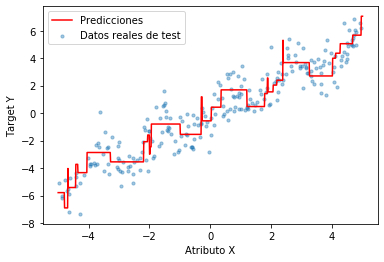

In [37]:
# División en dos datasets: train (con el que se optimizan los hiperparámetros) y test (con el que 
# se prueba el rendimiento del modelo)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

# Obtención del mejor parámetro de profundidad del árbol entre 3 y 7 usando validación cruzada
# y GridSearch

regr = DecisionTreeRegressor()

params = {"max_depth": range(3,7)} # Se prueban valores entre 3 y 7 

regr_opt = GridSearchCV(regr, params, cv=3) # Se divide en 3 conjuntos para hacer validación cruzada

regr_opt.fit(X_train, y_train)

print("El mejor estimador es: {}".format(regr_opt.best_estimator_))

y_train_pred = regr_opt.predict(X_train)

y_test_pred = regr_opt.predict(X_test)

print("La R^2 en los datos de train es: {}".format(np.round(r2_score(y_train, y_train_pred),2)))

print("La R^2 en los datos de test es: {}".format(np.round(r2_score(y_test, y_test_pred),2)))


X_fit = np.linspace(-5,5, 1000).reshape(1000, 1)

y_fit = regr_opt.predict(X_fit)

plt.scatter(X_test, y_test, label = "Datos reales de test", alpha=0.4, s=10)

plt.plot(X_fit, y_fit, c="red", label = "Predicciones")

plt.legend()

plt.xlabel("Atributo X")

plt.ylabel("Target Y")

plt.show()

## Algoritmos de bagging. Random forest

In [38]:
np.random.rand(100, 1)

array([[0.4648784 ],
       [0.96240799],
       [0.81397492],
       [0.86908728],
       [0.01287726],
       [0.94751436],
       [0.25464862],
       [0.63023682],
       [0.45659913],
       [0.61179153],
       [0.58101858],
       [0.77128896],
       [0.55154851],
       [0.55993728],
       [0.59177411],
       [0.21841338],
       [0.68348944],
       [0.98305975],
       [0.92611821],
       [0.23496389],
       [0.97764097],
       [0.83014818],
       [0.96665167],
       [0.97470302],
       [0.46573156],
       [0.62667545],
       [0.2662897 ],
       [0.20863952],
       [0.44840682],
       [0.25062143],
       [0.85260936],
       [0.05846388],
       [0.28915337],
       [0.17765174],
       [0.09857791],
       [0.50979859],
       [0.85479927],
       [0.43571265],
       [0.26530284],
       [0.88215668],
       [0.9211267 ],
       [0.50579863],
       [0.65812517],
       [0.06149865],
       [0.3414053 ],
       [0.38962978],
       [0.50547302],
       [0.848